## Setup

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [2]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

### Create the training data.

In [3]:
nx = 11
nt = 11
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 1, nt)
x_train = np.array(list(zip(np.tile(xt, nt), np.repeat(tt, nx))))

### Read the differential equation.

In [4]:
eq_name = 'diff1d_0'
eq = PDE2DIFF1D(eq_name)

### Compute the analytical solution.

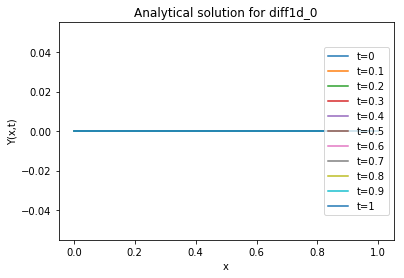

In [5]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = eq.Yaf(x_train[i])
Ya = Ya.reshape((nt, nx))
for i in range(nt):
    plt.plot(xt, Ya[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Y(x,t)')
plt.legend(loc='right')
plt.title('Analytical solution for %s' % eq_name);

## BFGS (default)

In [9]:
net1 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net1.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net1.res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 99
         Function evaluations: 105
         Gradient evaluations: 105
18.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 1.9993439522211517e-07
 hess_inv: array([[ 218.00889054, -270.83629133,   -9.73466941, ...,  -18.95984487,
         100.72961957,   11.33399537],
       [-270.83629133,  958.96132642, -144.86719928, ...,    5.07579296,
         -14.84585506,   30.07736193],
       [  -9.73466941, -144.86719928,   63.12805515, ...,   18.23229845,
         -71.52231568,  -27.44452798],
       ...,
       [ -18.95984487,    5.07579296,   18.23229845, ...,   15.51373147,
         -54.32024539,  -18.37701099],
       [ 100.72961957,  -14.84585506,  -71.52231568, ...,  -54.32024539,
         205.5832492 ,   66.30880761],
       [  11.33399537,   30.07736193,  -27.44452798, ...,  -18.37701099,
          66.30880761,   25.75075357]])
      jac: array([-4.59075872e-0

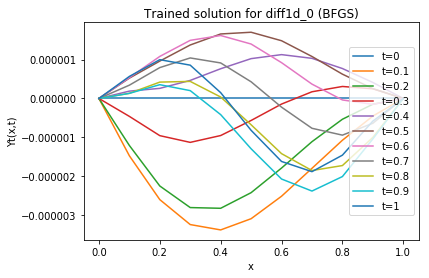

In [10]:
Yt1 = net1.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s)' % (eq_name, trainalg));

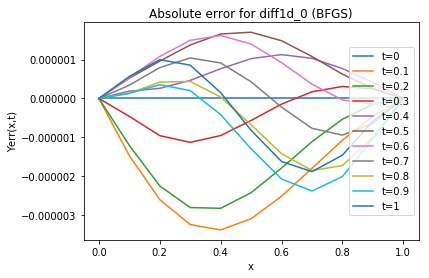

In [11]:
Y_err1 = Yt1 - Ya
for i in range(nt):
    plt.plot(xt, Y_err1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s)' % (eq_name, trainalg));

## BFGS (gtol=1e-6)

In [12]:
net2 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-6
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net2.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net2.res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 129
         Function evaluations: 137
         Gradient evaluations: 137
24.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 4.327609993669476e-08
 hess_inv: array([[  295.43876031,   120.32274169,   281.92251843, ...,
           95.44225671,  -130.25147102,  -153.39086519],
       [  120.32274175,  5551.80593718,  7054.04576859, ...,
         2261.47363107, -5225.09429703, -3223.38184614],
       [  281.92251852,  7054.04576835, 10711.71293871, ...,
         3414.00123502, -8101.31674771, -4865.53521265],
       ...,
       [   95.44225674,  2261.47363099,  3414.00123502, ...,
         1093.05123822, -2594.28474215, -1556.69138598],
       [ -130.25147109, -5225.09429687, -8101.31674777, ...,
        -2594.28474217,  6231.22463844,  3688.343334  ],
       [ -153.39086523, -3223.38184603, -4865.53521267, ...,
        -1556.69138599,  3688.34333399,  2221.18770371

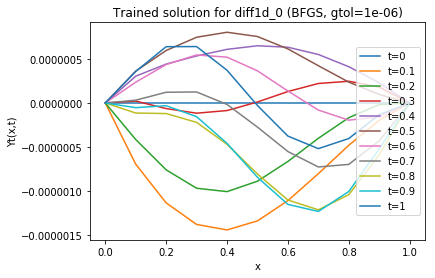

In [13]:
Yt2 = net2.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

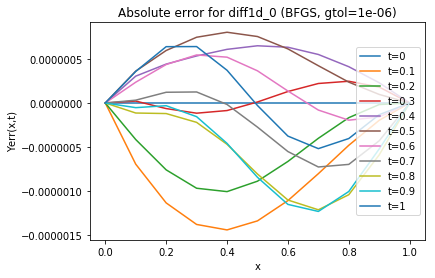

In [14]:
Y_err2 = Yt2 - Ya
for i in range(nt):
    plt.plot(xt, Y_err2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

## BFGS (gtol=1e-8)

In [16]:
net3 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-8
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net3.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net3.res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 359
         Function evaluations: 387
         Gradient evaluations: 387
1min 13s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 3.8277713996443875e-10
 hess_inv: array([[  27518.53153805,  133765.39776112,  -41740.08737488, ...,
         -10562.86774598,  -12631.23379024,  -29244.11342724],
       [ 133765.39787246,  953090.11123171, -179675.78836409, ...,
         -58803.08757582, -115710.72560544, -158336.7109591 ],
       [ -41740.0873501 , -179675.78805256,   69510.92724713, ...,
          16465.96114109,   13192.19799253,   43058.43006886],
       ...,
       [ -10562.86774506,  -58803.08751552,   16465.96114187, ...,
           5080.33242825,    4067.86291696,    9860.51602434],
       [ -12631.23378493, -115710.72560572,   13192.19798942, ...,
           4067.86291468,   21142.20207033,   21272.08880181],
       [ -29244.11339699, -158336.71075518,   43058.

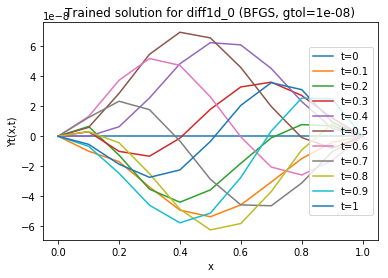

In [17]:
Yt3 = net3.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

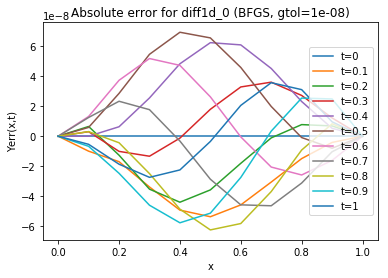

In [18]:
Y_err3 = Yt3 - Ya
for i in range(nt):
    plt.plot(xt, Y_err3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

## BFGS (gtol=1e-10)

In [19]:
net4 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-10
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net4.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net4.res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2779
         Function evaluations: 3043
         Gradient evaluations: 3043
9min 17s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 3.2015909320602346e-14
 hess_inv: array([[ 3.45977765e+08, -1.32066068e+08,  2.43959196e+08, ...,
         1.49582772e+08, -4.71544987e+07, -1.16324301e+08],
       [-1.32500449e+08,  2.35114968e+08, -1.11492223e+07, ...,
        -1.06853110e+08,  1.98329051e+07,  5.49064544e+07],
       [ 2.43739777e+08, -1.07379057e+07,  2.31634690e+08, ...,
         7.90656419e+07, -2.63295061e+07, -6.61361405e+07],
       ...,
       [ 1.49703074e+08, -1.06710746e+08,  7.92491173e+07, ...,
         8.87861766e+07, -3.39299362e+07, -6.25612320e+07],
       [-4.71572221e+07,  1.97837068e+07, -2.63531646e+07, ...,
        -3.39162308e+07,  2.30610989e+07,  2.96941509e+07],
       [-1.16340014e+08,  5.47950464e+07, -6.62037197e+07, ...,
        -6.2533

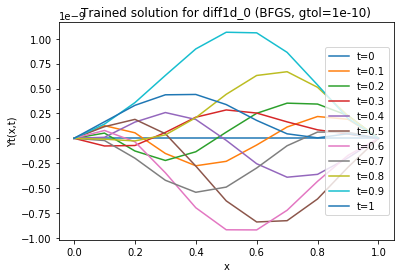

In [20]:
Yt4 = net4.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

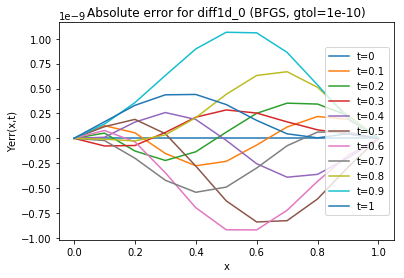

In [21]:
Y_err4 = Yt4 - Ya
for i in range(nt):
    plt.plot(xt, Y_err4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

## BFGS (gtol=1e-12)

In [22]:
net5 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-12
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net5.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net5.res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2787
         Function evaluations: 3051
         Gradient evaluations: 3051
9min 43s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 3.201589167097066e-14
 hess_inv: array([[ 3.89656498e+08,  1.18554880e+08,  3.78360137e+08, ...,
         1.66285629e+08, -1.30803823e+08, -1.63646092e+08],
       [ 1.19308004e+08,  1.49893858e+09,  7.25675250e+08, ...,
        -4.67101080e+07, -3.66757011e+08, -1.65811487e+08],
       [ 3.78793339e+08,  7.25304880e+08,  6.47332747e+08, ...,
         1.12470090e+08, -2.52514268e+08, -1.93311149e+08],
       ...,
       [ 1.66144263e+08, -4.75007719e+07,  1.11973149e+08, ...,
         1.01279963e+08, -6.18895488e+07, -8.03019543e+07],
       [-1.30868682e+08, -3.66049321e+08, -2.52168054e+08, ...,
        -6.20912967e+07,  1.50540600e+08,  1.04602453e+08],
       [-1.63622880e+08, -1.65219766e+08, -1.92969189e+08, ...,
        -8.03996

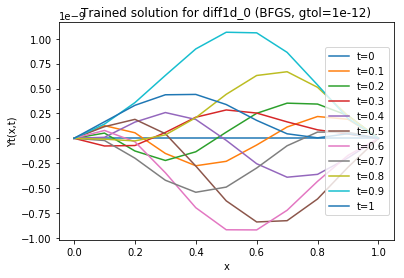

In [23]:
Yt5 = net5.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt5[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

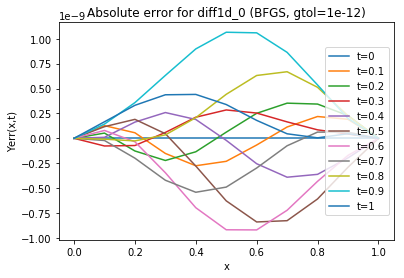

In [24]:
Y_err5 = Yt5 - Ya
for i in range(nt):
    plt.plot(xt, Y_err5[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

## BFGS (gtol=1e-14)

In [25]:
net6 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-14
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net6.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net6.res)

         Current function value: 0.000000
         Iterations: 2789
         Function evaluations: 3158
         Gradient evaluations: 3145
9min 44s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 3.201589162157084e-14
 hess_inv: array([[ 3.85078490e+08,  1.01919121e+08,  3.67778354e+08, ...,
         1.63972376e+08, -1.24327507e+08, -1.59811631e+08],
       [ 1.02707159e+08,  1.47314713e+09,  6.94882688e+08, ...,
        -5.43679952e+07, -3.52008056e+08, -1.52098559e+08],
       [ 3.68216651e+08,  6.94449942e+08,  6.23245390e+08, ...,
         1.07922425e+08, -2.39789073e+08, -1.84167718e+08],
       ...,
       [ 1.63849793e+08, -5.49742550e+07,  1.07521128e+08, ...,
         9.96007432e+07, -5.84221325e+07, -7.83437039e+07],
       [-1.24420598e+08, -3.51497369e+08, -2.39560061e+08, ...,
        -5.85727994e+07,  1.43219946e+08,  9.90698077e+07],
       [-1.59796938e+08, -1.51569269e+08, -1.83866636e+08, ...,
        -7.84163726e+07,  9.90001428e+07,  9.63742198e

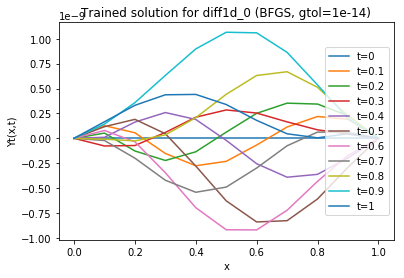

In [26]:
Yt6 = net6.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt6[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

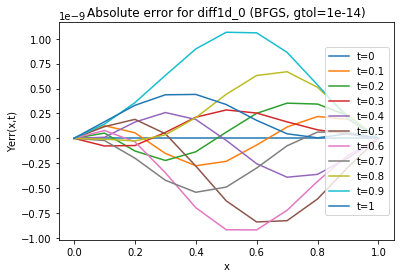

In [27]:
Y_err6 = Yt6 - Ya
for i in range(nt):
    plt.plot(xt, Y_err6[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));